In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [2]:
parent_path = '../../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/Lund/'

SMPS = read_SMPS(path, parent_path, [0, 0])
OPS_APS = read_OPS(path, parent_path)
MA = read_csv_BC(path + 'MA300/', parent_path)
partector_keys = ['101024_20241016', '142542_20241016', '091255_20241017', '131923_20241017']
partector = read_partector(path + 'Partector/', parent_path, partector_keys)

NS_dict_keys = ['2024-10-15_NanoScan', '2024-10-16_NanoScan', '2024-10-17_NanoScan']
NS_bins = SMPS['2024-10-21_NanoScan'].keys()[3:16].to_list()

NS_bg_mean, NS_bg_std, NS_bg_error = bin_mean(['2024/10/21 11:45:00', '2024/10/21 14:10:00'], 
                                              SMPS['2024-10-21_NanoScan'], NS_bins, 'Time', 0.1)

for key in NS_dict_keys:
    df = SMPS[key]
    for i, bin in enumerate(NS_bins):
        df[bin] = df[bin] - NS_bg_mean[i]

    SMPS[key] = df

for key in OPS_APS['20241016_APS'].keys()[4:56]:
    OPS_APS['20241016_APS'][key] = pd.to_numeric(OPS_APS['20241016_APS'][key]) * 1000

Failed to read file with separation: 	
Failed to read file with separation: ,
Failed to read file with separation: ,
Failed to read file with separation: 	
Failed to read file with separation: ,
Failed to read file with separation: ,


c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\read_data_functions.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key][df[key] < 0] = 0
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\read_data_functions.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key][df[key] < 0] = 0
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\read_data_functions.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

In [3]:
APS_dict_keys = ['20241016_APS', '20241016_APS_2_exp', '20241017_APS', '20241017_APS']
APS_bins = OPS_APS['20241016_APS'].keys()[1:53].to_list()
APS_bin_mean = [(0.486968 + 0.523)/2]
for key in OPS_APS['20241016_APS'].keys()[2:53]:
    APS_bin_mean.append(float(key))
    OPS_APS['20241016_APS'][key] = pd.to_numeric(OPS_APS['20241016_APS'][key], errors='coerce') * 7.86
APS_cut_point = np.concatenate(([0.486968], (np.array(APS_bin_mean)[1:]+np.array(APS_bin_mean)[:-1])/2, [20.53]))

APS_mass_conc = {}
APS_mass_conc['20241016_APS'] = OPS_APS['20241016_APS']
for key in APS_dict_keys[1:3]:
    for i, bin in enumerate(APS_bins):
        bin_width = np.log10(APS_cut_point[i+1]) - np.log10(APS_cut_point[i])
        OPS_APS[key][bin] = pd.to_numeric(OPS_APS[key][bin]) * bin_width
    mass_conc = calc_mass_conc(OPS_APS[key], APS_bins, APS_bin_mean, 7.86)
    APS_mass_conc[key] = mass_conc

APS_number = pd.DataFrame({'Time': OPS_APS['20241016_APS']['Time']})
for i, key in enumerate(APS_bins):
        # Ensure df[key] is numeric
        OPS_APS['20241016_APS'][key] = pd.to_numeric(OPS_APS['20241016_APS'][key], errors='coerce')
        
        APS_number[key] = OPS_APS['20241016_APS'][key] / ((7.86 / 10**6) * (np.pi / 6) * APS_bin_mean[i]**3 * 10**6) # in #/cm**3
OPS_APS['20241016_APS'] = APS_number

SMPS_dict_keys = ['20241016_SMPS', '20241016_SMPS_2_exp', '20241017_SMPS', '20241017_SMPS']
SMPS_bins = SMPS['20241016_SMPS'].keys()[4:117].to_list()
SMPS_bin_mean = []
for key in SMPS['20241016_SMPS'].keys()[4:117]:
    SMPS_bin_mean.append(float(key) / 1000)
SMPS_cut_point = np.concatenate(([0.017], (np.array(SMPS_bin_mean)[1:]+np.array(SMPS_bin_mean)[:-1])/2, [1.0]))

for key in SMPS_dict_keys[:3]:
    for i, bin in enumerate(SMPS_bins):
        bin_width = np.log10(SMPS_cut_point[i+1]) - np.log10(SMPS_cut_point[i])
        SMPS[key][bin] = pd.to_numeric(SMPS[key][bin]) * bin_width

In [4]:
timestamps_wBG = [['2024-10-16 09:50:00', '2024-10-16 12:50:00'],
                  ['2024-10-16 14:30:00', '2024-10-16 16:30:00'],
                  ['2024-10-17 09:30:00', '2024-10-17 12:10:00'],
                  ['2024-10-17 14:10:00', '2024-10-17 15:30:00']]

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


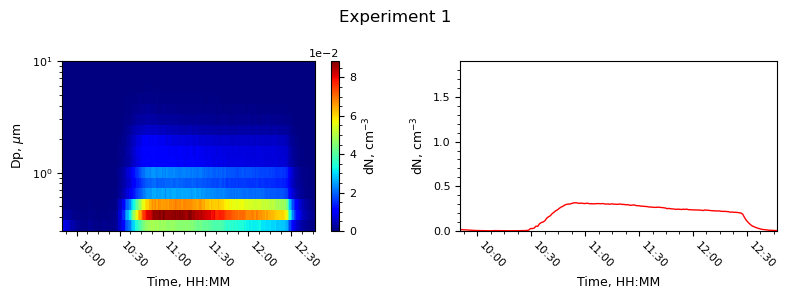

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


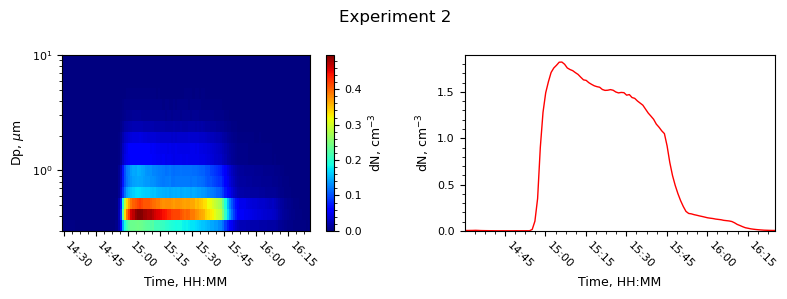

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


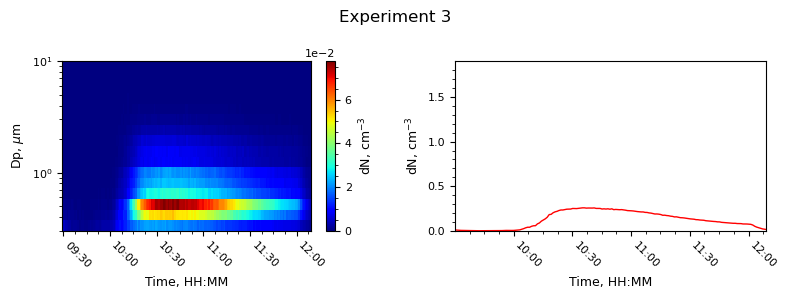

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


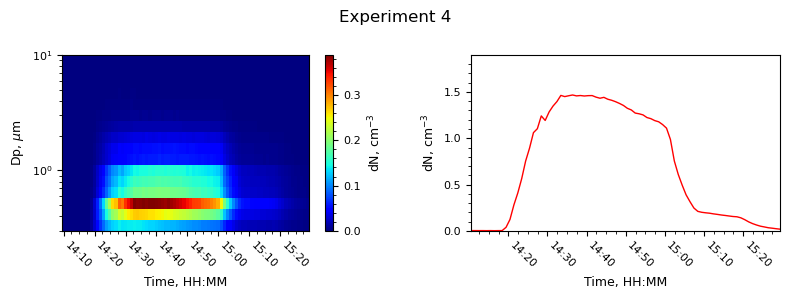

In [5]:
OPS_dict_keys = ['Exp1', 'Exp2', 'Exp3', 'Exp4']
OPS_cut_point = [0.300, 0.374, 0.465, 0.579, 0.721, 0.897, 1.117, 1.391, 1.732, 2.156, 2.685, 3.343, 4.162, 5.182, 6.451, 8.031, 10.000]
OPS_keys = OPS_APS['Exp1'].keys()[1:17].to_list()

for i, key in enumerate(OPS_dict_keys):
    name = 'Timeseries/OPS_timeseries_' + key + '.png'

    fig, ax = plt.subplots(1, 2, figsize = (8, 3))

    plot_timeseries(fig, ax, OPS_APS[key], OPS_keys, OPS_cut_point, 'number', timestamps_wBG[i])

    ax[1].set_ylim(0, 1.9)

    title = 'Experiment ' + str(i + 1)
    fig.suptitle(title)

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


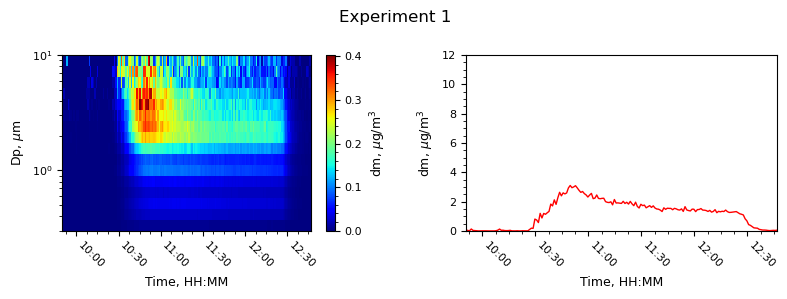

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


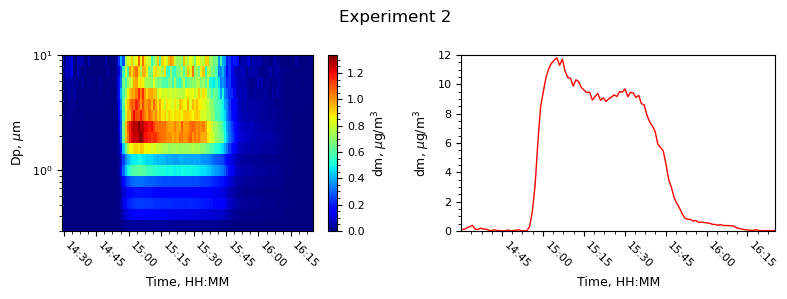

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


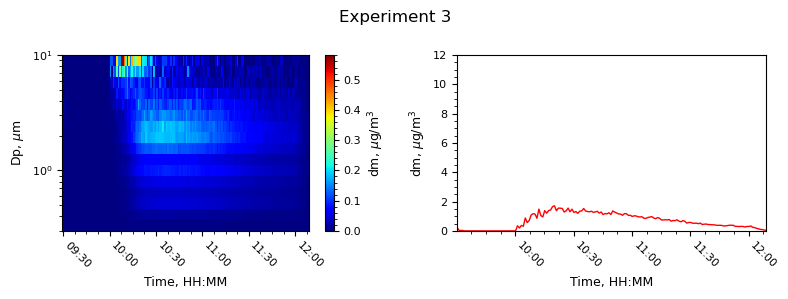

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


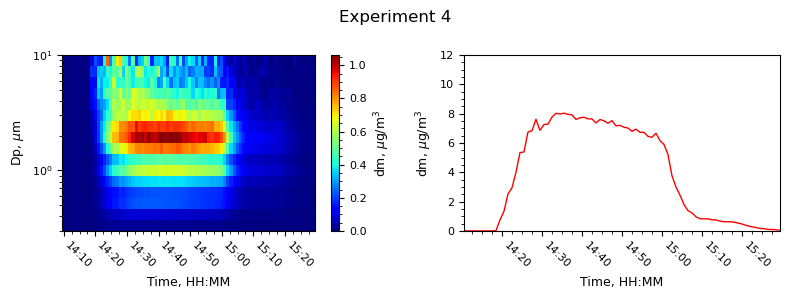

In [6]:
OPS_dict_keys = ['Exp1', 'Exp2', 'Exp3', 'Exp4']
OPS_mid_point = [0.337, 0.419, 0.522, 0.650, 0.809, 1.007, 1.254, 1.562, 1.944, 2.421, 3.014, 3.752, 4.672, 5.816, 7.241, 9.015]

OPS_mass_conc = {}
for key in OPS_dict_keys:
    mass_conc = calc_mass_conc(OPS_APS[key], OPS_keys, OPS_mid_point, 7.86)
    OPS_mass_conc[key] = mass_conc

for i, key in enumerate(OPS_dict_keys):
    name = 'Timeseries/OPS_timeseries_' + key + 'mass.png'

    fig, ax = plt.subplots(1, 2, figsize = (8, 3))

    plot_timeseries(fig, ax, OPS_mass_conc[key], OPS_keys, OPS_cut_point, 'mass', timestamps_wBG[i])

    ax[1].set_ylim(0, 12)

    title = 'Experiment ' + str(i + 1)
    fig.suptitle(title)

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


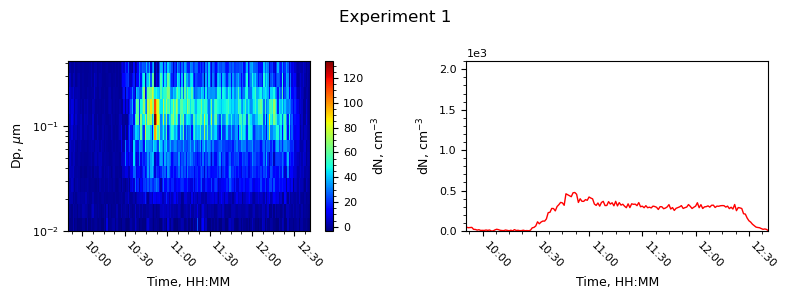

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


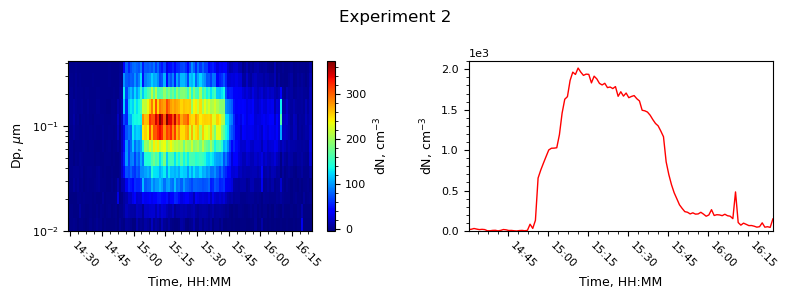

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


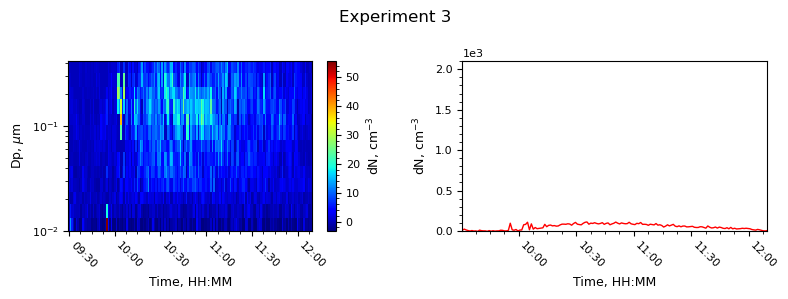

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


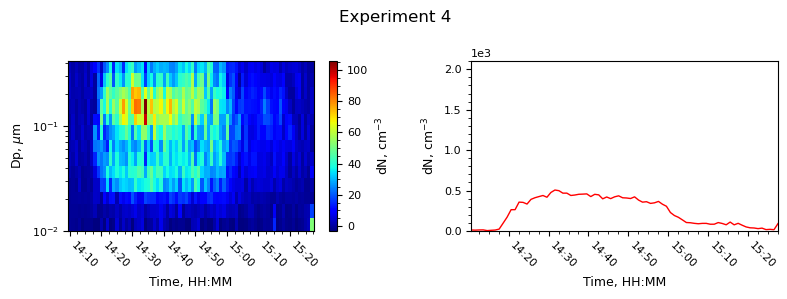

In [7]:
NanoScan_dict_keys = ['2024-10-16_NanoScan', '2024-10-16_NanoScan', '2024-10-17_NanoScan', '2024-10-17_NanoScan']
NanoScan_bin_mean = []
for key in SMPS['2024-10-16_NanoScan'].keys()[3:16]:
    NanoScan_bin_mean.append(float(key) / 1000)
NanoScan_Bins = SMPS['2024-10-16_NanoScan'].keys()[3:16].to_list()

NanoScan_cut_point = bin_edges(0.010, NanoScan_bin_mean)

for i, key in enumerate(NanoScan_dict_keys):
    exp_number = i + 1
    name = 'Timeseries/NanoScan_timeseries_Exp' + str(exp_number) + '.png'

    fig, ax = plt.subplots(1, 2, figsize = (8, 3))

    plot_timeseries(fig, ax, SMPS[key], NanoScan_Bins, NanoScan_cut_point, 'number', timestamps_wBG[i])

    ax[1].set_ylim(0, 2100)

    title = 'Experiment ' + str(i + 1)
    fig.suptitle(title)

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


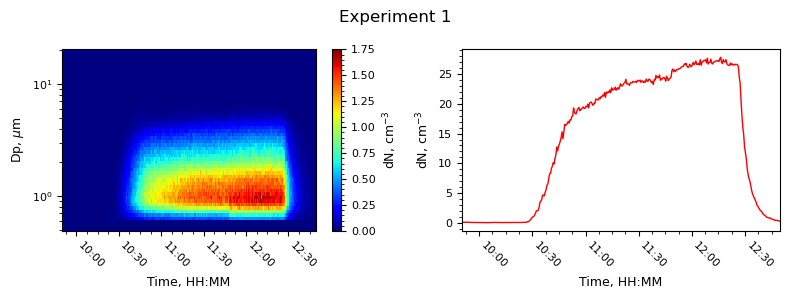

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


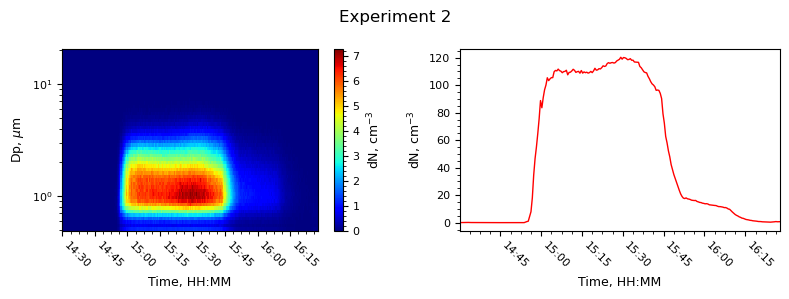

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


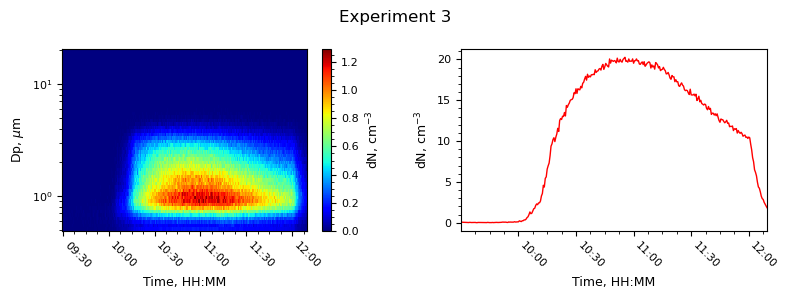

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


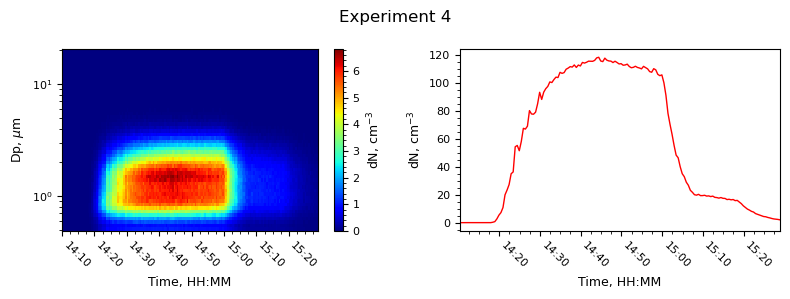

In [8]:
for i, key in enumerate(APS_dict_keys):
    exp_number = i + 1
    name = 'Timeseries/APS_timeseries_Exp' + str(exp_number) + '.png'

    fig, ax = plt.subplots(1, 2, figsize = (8, 3))

    plot_timeseries(fig, ax, OPS_APS[key], APS_bins, APS_cut_point, 'number', timestamps_wBG[i])

    title = 'Experiment ' + str(i + 1)
    fig.suptitle(title)

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


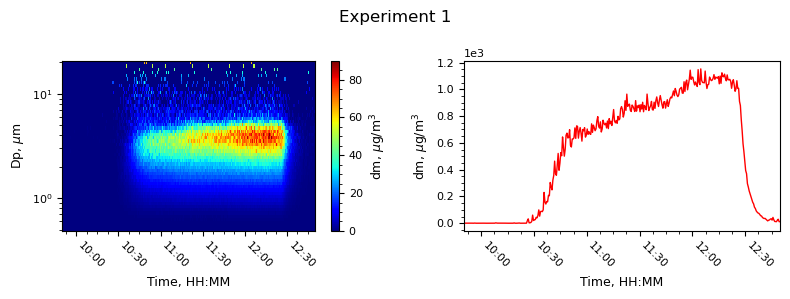

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


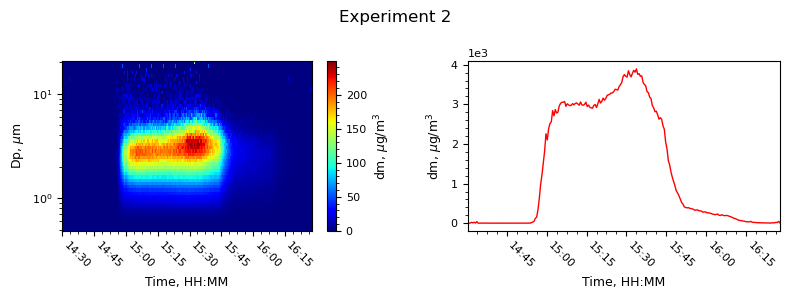

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


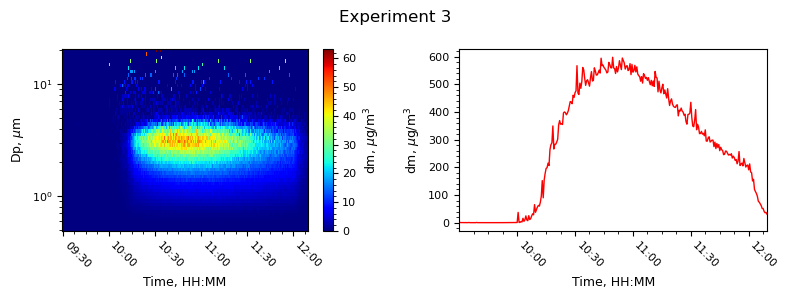

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:237: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-45, ha="left")
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:249: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-45, ha="left")


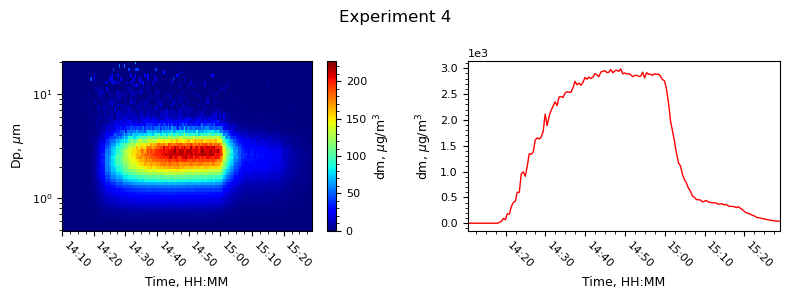

In [9]:
for i, key in enumerate(APS_dict_keys):
    exp_number = i + 1
    name = 'Timeseries/APS_timeseries_Exp' + str(exp_number) + 'mass.png'

    fig, ax = plt.subplots(1, 2, figsize = (8, 3))

    plot_timeseries(fig, ax, APS_mass_conc[key], APS_bins, APS_cut_point, 'mass', timestamps_wBG[i])

    title = 'Experiment ' + str(i + 1)
    fig.suptitle(title)

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:217: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:217: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:217: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

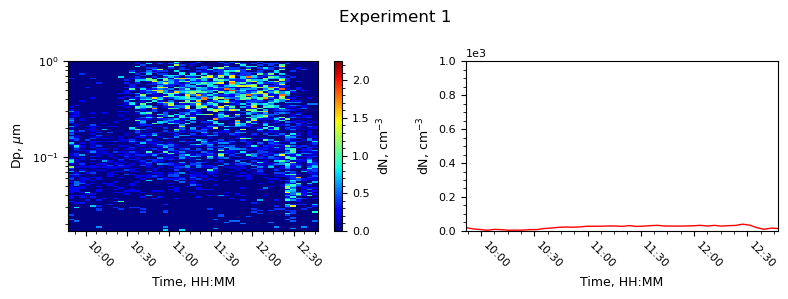

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:217: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:217: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:217: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

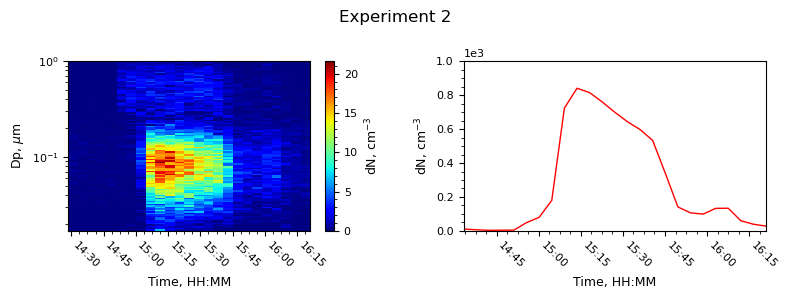

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:217: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:217: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:217: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

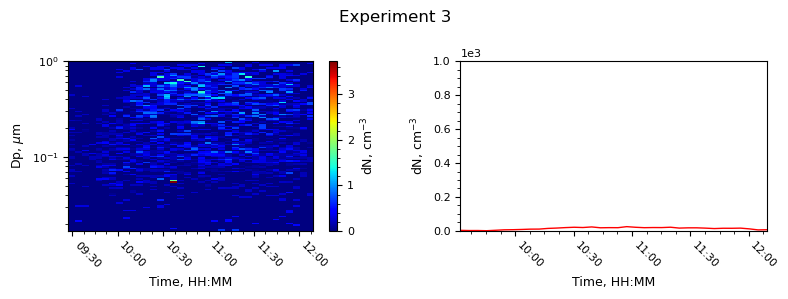

c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:217: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:217: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[key] = filtered_conc
c:\Users\B363580\Documents\GitHub\Master-thesis\Lund Brake Wear\..\plot_functions.py:217: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times

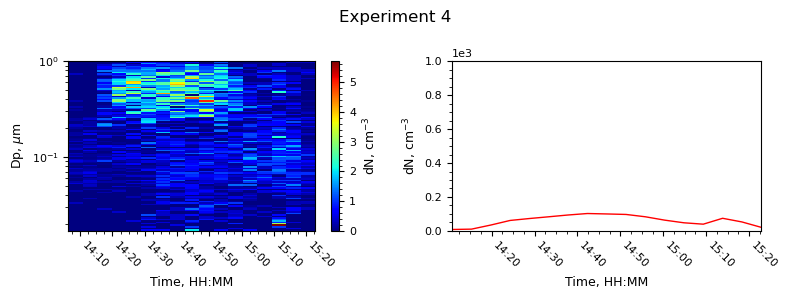

In [10]:
for i, key in enumerate(SMPS_dict_keys):

    exp_number = i + 1
    name = 'Timeseries/SMPS_timeseries_Exp' + str(exp_number) + '.png'

    fig, ax = plt.subplots(1, 2, figsize = (8, 3))

    plot_timeseries(fig, ax, SMPS[key], SMPS_bins, SMPS_cut_point, 'number', timestamps_wBG[i])

    ax[1].set_ylim(0, 1000)

    title = 'Experiment ' + str(i + 1)
    fig.suptitle(title)

    fig.tight_layout()
    fig.savefig(name, dpi = 600)
    plt.show()

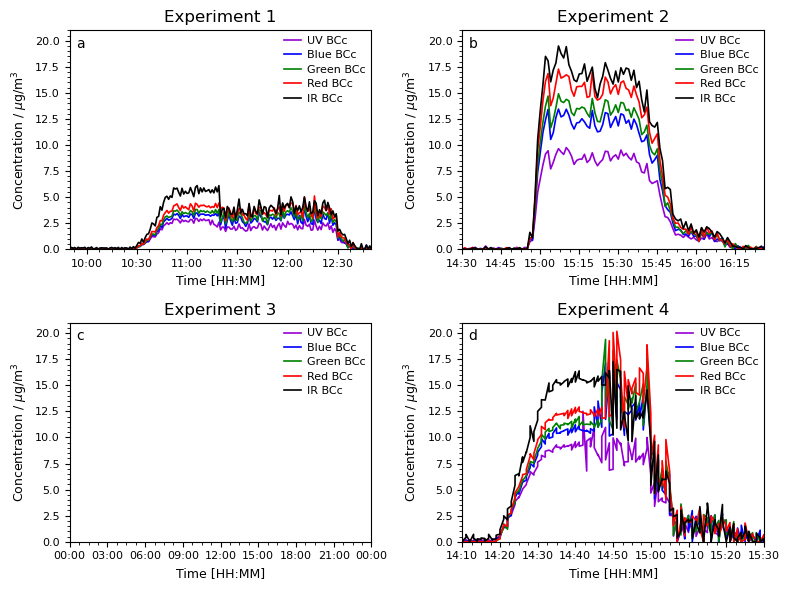

In [11]:
MA_dict_keys = ['MA300-0046_241016092601', 'MA300-0046_241016092601', 'MA300-0046_241017131930', 'MA300-0046_241017131930']

fig, axes = plt.subplots(2, 2, figsize = (8, 6))

for i, key in enumerate(MA_dict_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    ma_single_timeseries(ax, MA[key], False, timestamps_wBG[i], 1)

    ax.set_ylim(0, 21)

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
fig.savefig('Timeseries/MA300-0046_timeseries.png', dpi = 600)

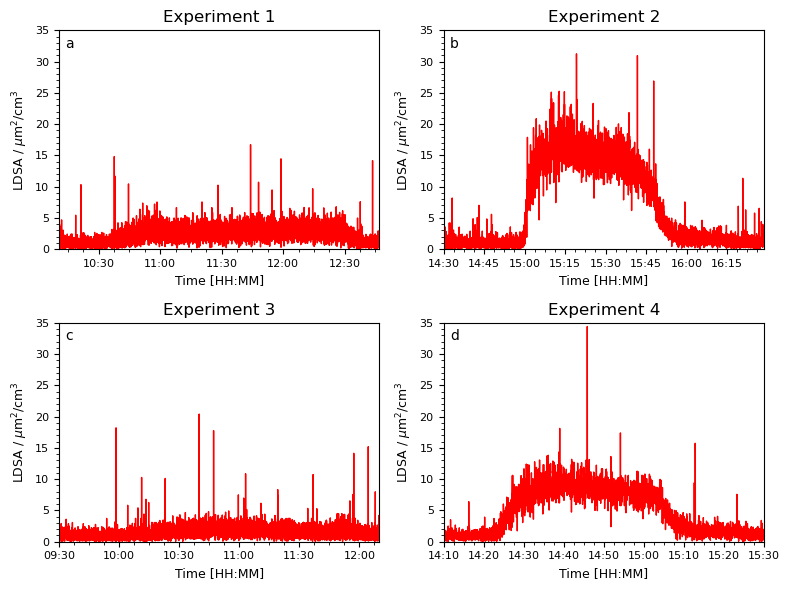

In [12]:
fig, axes = plt.subplots(2, 2, figsize = (8, 6))

for i, key in enumerate(partector_keys):
    if i == 0:
        ax = axes[0][0]
    if i == 1:
        ax = axes[0][1]
    if i == 2:
        ax = axes[1][0]
    if i == 3:
        ax = axes[1][1]

    partector_single_timeseries(ax, partector[key], timestamps_wBG[i], 1)

    ax.set_ylim(0, 35)

    title = 'Experiment ' + str(i + 1)
    ax.set_title(title)

sublabels = ['a', 'b', 'c', 'd']
for ax, l in zip(axes.flatten(), sublabels):
    ax.text(0.02, 0.92, l, transform = ax.transAxes, fontsize = 10)

fig.tight_layout()
fig.savefig('Timeseries/partector_timeseries.png', dpi = 600)